In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import math

Complementaria: TALLER 2 
Ejercicio #3: Cuadratura Gaussiana

1. Cuadratura de Gauss Laguerre

In [3]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

#1 Get Laguerre
def GetLaguerreRecursive(n,x):

    if n==0:
        poly = sym.Number(1)
    elif n==1:
        poly = 1 - x
    else:
        poly = ((2*(n-1)+1-x)*GetLaguerreRecursive(n-1,x)-(n-1)*GetLaguerreRecursive(n-2,x))/n
   
    return sym.expand(poly,x)


#2 Get All Roots 
def GetDLaguerre(n,x):
    Pn = GetLaguerreRecursive(n,x)
    return sym.diff(Pn,x,1)

def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn
    
def GetRoots(f,df,x,tolerancia = 10):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)

        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

def GetAllRootsGLag(n):

    xn = np.linspace(0,n + (n-1)*math.sqrt(n), 100)
    
    Laguerre = []
    DLaguerre = []
    
    for i in range(n+1):
        Laguerre.append(GetLaguerreRecursive(i,x))
        DLaguerre.append(GetDLaguerre(i,x))
    
    poly = sym.lambdify([x],Laguerre[n],'numpy')
    Dpoly = sym.lambdify([x],DLaguerre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    
    return Roots

#3 Get Weights
def GetWeightsGLag(n):

    Roots = GetAllRootsGLag(n)

    

    Laguerre = []
    
    for i in range(n+2):
        Laguerre.append(GetLaguerreRecursive(i,x))
    
    poly = sym.lambdify([x],Laguerre[n+1],'numpy')
    Weights = Roots/((n+1)**2*(poly(Roots))**2)
    
    return Weights

n = 5
raices = GetAllRootsGLag(n)
pesos = GetWeightsGLag(n)
funcion = lambda x: 1 #Esta la cambias por la función que quieras 

I = 0
for i in range(n):
    I += pesos[i]*funcion(raices[i])

2. Cuadratura Gauss_Hermite

In [4]:
#1
def GetHermite(n,x):

    if n==0:
        poly = sym.Number(1)
    elif n==1:
        poly = 2*x
    else:
        poly = (2*x)*GetHermite(n-1,x) - (2*(n-1))*GetHermite(n-2,x)
    
    return sym.expand(poly,x)


#2

def GetDHermite(n,x):
    Pn = GetHermite(n,x)
    return sym.diff(Pn,x,1)

def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn
    
def GetRoots(f,df,x,tolerancia = 10):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)

        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

def GetAllRootsGHer(n):

    xn = np.linspace(-np.sqrt((4*n)+1),np.sqrt((4*n)+1),100)
    
    Hermite = []
    DHermite = []
    
    for i in range(n+1):
        Hermite.append(GetHermite(i,x))
        DHermite.append(GetDHermite(i,x))
    
    poly = sym.lambdify([x],Hermite[n],'numpy')
    Dpoly = sym.lambdify([x],DHermite[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    
    return Roots


#3

def GetWeightsGHer(n):

    Roots = GetAllRootsGHer(n)
    Hermite= []
    
    for i in range(n):
        Hermite.append(GetHermite(i,x))
    
    poly = sym.lambdify([x],Hermite[n-1],'numpy')
    Weights = (2**(n-1) * math.factorial(n) * np.sqrt(np.pi))/(n**2*(poly(Roots))**2)
    
    return Weights

n = 5
raices = GetAllRootsGHer(n)
pesos = GetWeightsGHer(n)

funcion = lambda x: 1 #Esta la cambias por la función que quieras 

I = 0
for i in range(n):
    I += pesos[i]*funcion(raices[i])

3. Aplicación

1. Demostrar que Integral = 1

In [5]:
#Demostrar integral = 1
#Usamos Gauss-Laguerre porque la integral es de 0 a infinito

n = 5
raices = GetAllRootsGLag(n)
pesos = GetWeightsGLag(n)

funcion = lambda u: 2*np.sqrt(u/np.pi)

I = 0
for i in range(n):
    I += pesos[i]*funcion(raices[i]) 

print(I)

1.0105058623263745


2. Gráfica P(v) para distintas temperaturas

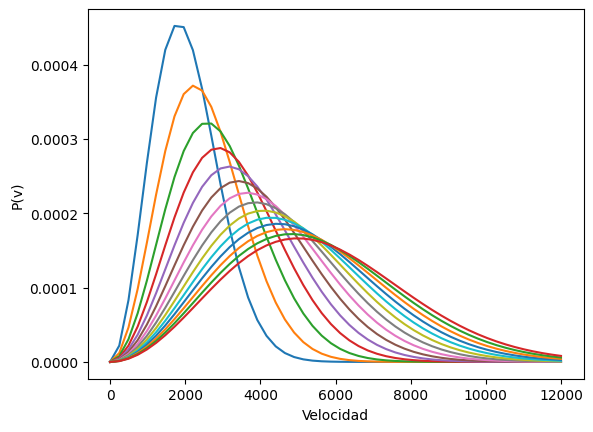

In [55]:
Pv = []
M = 0.0005
R = 8.31
for i in range(100,800,50):
    T = i 
    x_ = np.linspace(0, 12000)
    for j in x_:
        funcion = (4*np.pi*(M/(2*np.pi*R*T))**(3/2))*j**2*np.e**(-(M*j**2/(2*R*T)))
        Pv.append(funcion)
    plt.plot(x_,Pv)
    plt.xlabel("Velocidad")
    plt.ylabel("P(v)") 
    Pv = []   
plt.show()

Se puede observar en la gráfica que para temperaturas bajas, las velocidades más probables son bajas, y conforme aumenta la temperatura también aumenta la velocidad más probable para las partículas. Esto tiene sentido físico, pues el aumento de temperatura implica aumento de energía cinética y por ende aumento de velocidad.

3. Velocidad promedio para 10 distintas temperaturas

In [58]:
n = 5
raices = GetAllRootsGLag(n)
pesos = GetWeightsGLag(n)
M = 0.0005
R = 8.31

Vavg = []
Temps = []
print("Las velocidades promedio para 10 distintas temperaturas son:")
for i in range(100,200,10):
    T = i 
    I = 0
    funcion = lambda x: 4*np.sqrt(R*T/(2*np.pi*M))*x
    for j in range(n):
        I += pesos[j]*funcion(raices[j]) 
    print(I)
    Vavg.append(I)
    Temps.append(T)

Las velocidades promedio para 10 distintas temperaturas son:
2057.2428752993383
2157.654530448949
2253.59665813647
2345.6177698765955
2434.162596696828
2519.5976607297507
2602.229274439864
2682.316540147492
2760.080949237866
2835.7136088016346


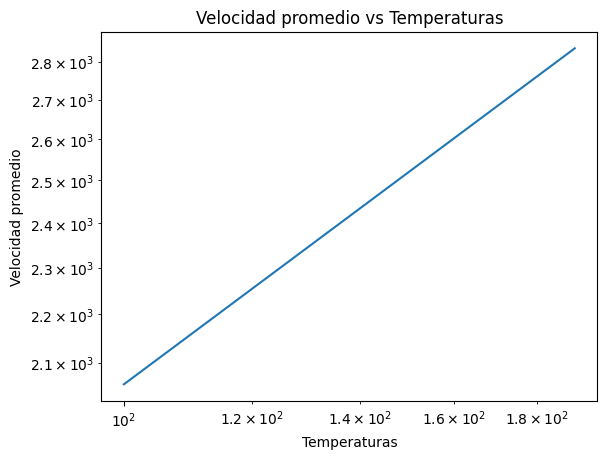

In [59]:
plt.loglog(Temps,Vavg)
plt.title("Velocidad promedio vs Temperaturas")
plt.xlabel("Temperaturas")
plt.ylabel("Velocidad promedio")
plt.show()

In [60]:
print("Las velocidades promedio teóricas para 10 distintas temperaturas son:")
for i in Temps: 
    Vteorica = np.sqrt((8*R*i)/(np.pi*M))
    print(Vteorica)

Las velocidades promedio teóricas para 10 distintas temperaturas son:
2057.242874990622
2157.6545301251654
2253.5966577982886
2345.617769524605
2434.16259633155
2519.5976603516524
2602.229274049366
2682.316539744975
2760.08094882368
2835.713608376099


Podemos observar que los resultados obtenidos son casi exactamente iguales y, por lo tanto, verificamos que se cumplen las igualdades propuestas en la guía de trabajo. 

4. Velocidad media cuadrática para 10 distintas temperaturas

In [76]:
n = 5
raices = GetAllRootsGLag(n)
pesos = GetWeightsGLag(n)
M = 0.0005
R = 8.31

Vrms = []
temps = []
print("Las velocidades medias cuadráticas para 10 distintas temperaturas son:")
for i in range(100,200,10):
    T = i 
    I = 0
    funcion = lambda x: 4*np.sqrt(R*T/(2*np.pi*M))*x*np.sqrt(x*2*R*T/M)
    for j in range(n):
        I += pesos[j]*funcion(raices[j]) 
    I = np.sqrt(I)
    print(I)
    Vrms.append(I)
    temps.append(T)

Las velocidades medias cuadráticas para 10 distintas temperaturas son:
2231.4938467453076
2340.410491103727
2444.4790335927623
2544.2944453189416
2640.3391265682217
2733.010644343204
2822.641256146355
2909.512010579384
2993.8631596170035
3075.9019973526665


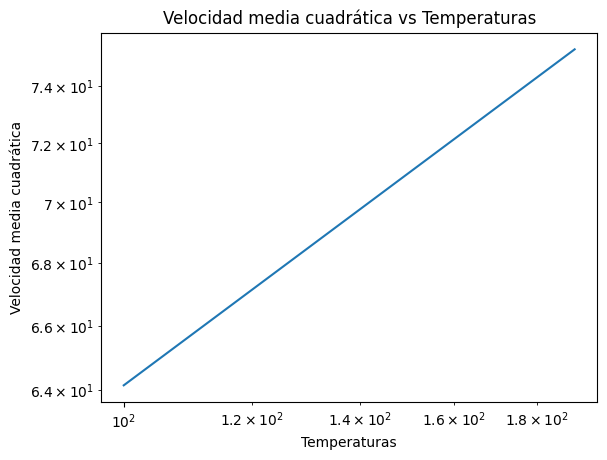

In [66]:
plt.loglog(Temps,Vrms)
plt.title("Velocidad media cuadrática vs Temperaturas")
plt.xlabel("Temperaturas")
plt.ylabel("Velocidad media cuadrática")
plt.show()

In [67]:
print("Las velocidades medias cuadráticas teóricas para 10 distintas temperaturas son:")
for i in temps: 
    Vteorica = np.sqrt((3*R*i)/M)
    print(Vteorica)

Las velocidades medias cuadráticas teóricas para 10 distintas temperaturas son:
2232.9352879114076
2341.922287352849
2446.058053276741
2545.937941113255
2642.0446627564793
2734.7760420187974
2824.464551025557
2911.3914199227834
2995.797055876783
3077.8888868833455


Podemos observar que los resultados obtenidos son casi exactamente iguales y, por lo tanto, verificamos que se cumplen las igualdades propuestas en la guía de trabajo. 